19BCB0007 - PATIL DARSHAN RAJKUMAR

# **DECISION TREE - GINI INDEX**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

In [ ]:
df = pd.read_csv('bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
df.shape

(11162, 17)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


In [ ]:
df.notnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
11158,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
11159,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
11160,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
X = df.iloc[:, [0,5]].values
X

array([[  59, 2343],
       [  56,   45],
       [  41, 1270],
       ...,
       [  32,   29],
       [  43,    0],
       [  34,    0]])

In [ ]:
y = df.iloc[:,-1].values
y

array(['yes', 'yes', 'yes', ..., 'no', 'no', 'no'], dtype=object)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [ ]:
clf=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0,min_samples_leaf=4)

In [ ]:
clf.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, random_state=0)

In [ ]:
y_predict=clf.predict(X_test)
y_predict

array(['no', 'no', 'yes', ..., 'no', 'no', 'no'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy Score : ', accuracy_score(y_predict,y_test))

Accuracy Score :  0.6076675026872089


In [ ]:
#print(Error Score)
print('Error Score : ',1-metrics.accuracy_score(y_test,y_predict))

Error Score :  0.3923324973127911


In [ ]:
cf = metrics.confusion_matrix(y_test, y_predict)
print(cf)

[[1304  199]
 [ 896  392]]


Text(0.5, 15.0, 'Predicted')

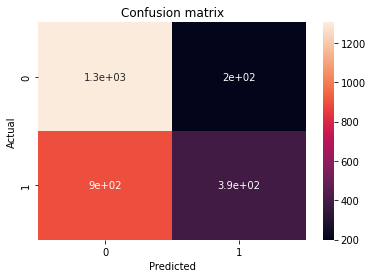

In [ ]:
sns.heatmap(pd.DataFrame(cf), annot=True)
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
#print(Classification_Report)
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

          no       0.59      0.87      0.70      1503
         yes       0.66      0.30      0.42      1288

    accuracy                           0.61      2791
   macro avg       0.63      0.59      0.56      2791
weighted avg       0.63      0.61      0.57      2791



[Text(0.5, 0.875, 'X[0] <= 60.5\ngini = 0.499\nsamples = 8371\nvalue = [4370, 4001]'),
 Text(0.25, 0.625, 'X[1] <= 194.5\ngini = 0.496\nsamples = 7907\nvalue = [4290, 3617]'),
 Text(0.125, 0.375, 'X[0] <= 28.5\ngini = 0.459\nsamples = 2464\nvalue = [1584, 880]'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 297\nvalue = [146, 151]'),
 Text(0.1875, 0.125, 'gini = 0.446\nsamples = 2167\nvalue = [1438, 729]'),
 Text(0.375, 0.375, 'X[0] <= 30.5\ngini = 0.5\nsamples = 5443\nvalue = [2706, 2737]'),
 Text(0.3125, 0.125, 'gini = 0.47\nsamples = 1016\nvalue = [383, 633]'),
 Text(0.4375, 0.125, 'gini = 0.499\nsamples = 4427\nvalue = [2323, 2104]'),
 Text(0.75, 0.625, 'X[1] <= 3833.0\ngini = 0.285\nsamples = 464\nvalue = [80, 384]'),
 Text(0.625, 0.375, 'X[1] <= 3657.0\ngini = 0.303\nsamples = 386\nvalue = [72, 314]'),
 Text(0.5625, 0.125, 'gini = 0.292\nsamples = 377\nvalue = [67, 310]'),
 Text(0.6875, 0.125, 'gini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.875, 0.375, 'X[1] <= 22199.0\ngini

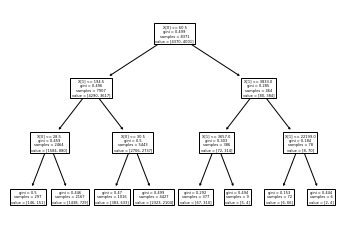

In [ ]:
tree.plot_tree(clf)